<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/8%20Gradient%20Decend/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import List, Callable
import matplotlib.pyplot as plt

In [7]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
                        return (f(x+h) - f(x)) / h

def square(x: float) -> float:
  return x * x

def derivative(x: float) -> float:
  return 2 * x             

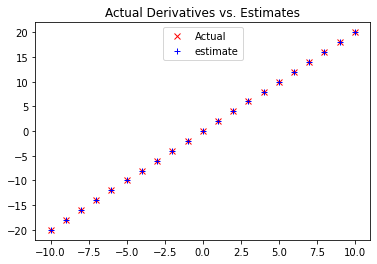


[-19.998999999984335, -17.998999999988996, -15.999000000007868, -13.999000000005424, -11.99900000000298, -9.999000000004088, -7.998999999999867, -5.998999999999199, -3.9989999999994197, -1.998999999999973, 0.001, 2.0009999999996975, 4.000999999999699, 6.000999999999479, 8.0010000000037, 10.001000000002591, 12.001000000005035, 14.00100000000748, 16.000999999988608, 18.000999999983947, 20.000999999993496]

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [9]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'estimate')
plt.legend(loc = 9)
plt.show()

print();print(estimates);print();print(actuals)

In [11]:
Vector = List[float]

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
                  
                  w = [v_j + (h if j == i else 0)
                        for j, v_j in enumerate(v)]
                  return (f(w)- f(v))/h

In [12]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
  return [partial_difference_quotient(f, v, i, h)
          for i in range(len(v))]